In [257]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [258]:
# #read csv 
with open('dataset.csv', 'r') as f:
    reader = csv.reader(f)
    dataTrain = [[float(r[0]), float(r[1]), -1] for r in reader]

In [259]:
def RumusEuc(x, y): 
    return np.sqrt(((x[0] - y[0])**2) + ((x[1] - y[1])**2))


def Transform(dataset, n):
    for i in range(n):
        mn = min([x[i] for x in dataset])
        mx = max([x[i] for x in dataset])
        for data in dataset:
            data[i] = (data[i] - mn)/(mx - mn)
    return dataset


In [260]:
dataTrain1= Transform(dataTrain,2 )

In [261]:
#INISIALISASI 

ns = 1200
lr = 0.1
thlr = 2    
radius = 2
thradius = 2
convergence = 0.000000001
best = []
tempDW = 0
iterations = 1000
colours = ['black', 'grey', 'red', 'green', 'blue', 'yellow', 'magenta', 'tan', 'aqua', 'violet', 'crimson', 'pink']

In [262]:
#random neuron 
neurons = [list(np.insert(np.random.rand(2), 2, x)) for x in range(ns)]

In [263]:
print("ITERATIONS\t\t:", iterations)
for iteration in range(iterations):
    data_rand = dataTrain1[np.random.randint(0,599)] 
    #menghitung dataset secara acak ke semua neuron
    dj=[]
    for neuron in neurons :
        d= RumusEuc(data_rand,neuron)
        dj.append(d)
    #menentukan winner
    win = neurons[np.argmin(dj)]
    if np.argmin(dj) not in best: best.append(np.argmin(dj))
    #menentukan tetanggaa bedasarkan radius
    tetangga = []
    for n in range(len(neurons)):
        if RumusEuc(win, neurons[n]) <= radius:
            tetangga.append(n)  
    #update neuron 
    for p in tetangga :
        s = RumusEuc(win, neurons[p])
        tij= np.exp((-s**2)/(2 * radius ** 2))
        dW = lr * tij * (RumusEuc(data_rand, neurons[p]))
        neurons[p][0] += dW
        neurons[p][1] += dW 
    dW = lr * tij* (RumusEuc(data_rand, win))
    a= np.absolute(dW - tempDW)
    if a < convergence: 
        break
    lr *= np.exp(-iteration / thlr)
    radius *= np.exp(-iteration / thradius)
#train dataset
for g in dataTrain1:
    dj = []
    for u in best:
        dj.append(RumusEuc(g, neurons[u]))
    win = neurons[np.argmin(dj)]
    # print(candidate_neuron, win_neuron)
    g[2] = int(win[2])
   

        

ITERATIONS		: 1000


Total Cluster	: 9


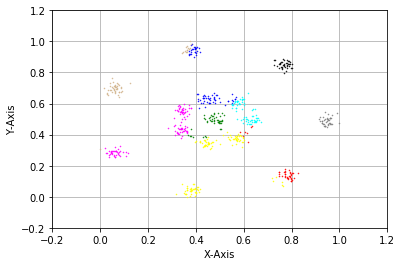

In [264]:
i = 0
for c in range(ns):
    cluster = []
    for data in dataTrain1:
        if (data[2] == c): cluster.append(data)

  # PLOT DATA INPUT
    plt.plot([x[0] for x in cluster], [x[1] for x in cluster], marker='.', color=colours[c % len(colours)], markersize=1, linestyle='None')

print("Total Cluster\t:", len(best))
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.axis([-0.2, 1.2, -0.2, 1.2])
plt.grid()
plt.show()